# Predicting Housing Prices: Develop a regression model to predict
# house prices based on features like location, size, and amenities. italicized text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Housing_Price_Dataset_120_Records.csv')
print(df.head())

  HouseID  Location  Area_sqft  Bedrooms  Bathrooms  Balcony  Parking  \
0    H001     Rural       1028         1          3        0        0   
1    H002     Rural       2316         1          4        0        0   
2    H003     Urban       1834         1          2        2        2   
3    H004     Urban       1719         3          1        0        2   
4    H005  Suburban       1118         2          3        0        0   

   Age_Years Furnished   Price  
0          5       Yes   55.84  
1          3       Yes  103.88  
2         23        No   86.42  
3         14        No   96.77  
4         13       Yes   63.94  


Data Preprocessing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HouseID    120 non-null    object 
 1   Location   120 non-null    object 
 2   Area_sqft  120 non-null    int64  
 3   Bedrooms   120 non-null    int64  
 4   Bathrooms  120 non-null    int64  
 5   Balcony    120 non-null    int64  
 6   Parking    120 non-null    int64  
 7   Age_Years  120 non-null    int64  
 8   Furnished  120 non-null    object 
 9   Price      120 non-null    float64
dtypes: float64(1), int64(6), object(3)
memory usage: 9.5+ KB


In [ ]:
pd.Index(['HouseID','Location','Area_sqft','Bedrooms','Bathrooms','Balcony','Parking','Age_Years','Furnished','Price'])

Index(['HouseID', 'Location', 'Area_sqft', 'Bedrooms', 'Bathrooms', 'Balcony',
       'Parking', 'Age_Years', 'Furnished', 'Price'],
      dtype='object')

In [ ]:
df=pd.get_dummies(df,columns=['Furnished','Location'],drop_first=False)


In [ ]:
df.head()

,HouseID,Area_sqft,Bedrooms,Bathrooms,Balcony,Parking,Age_Years,Price,Furnished_No,Furnished_Yes,Location_Rural,Location_Suburban,Location_Urban
0,H001,1028,1,3,0,0,5,55.84,False,True,True,False,False
1,H002,2316,1,4,0,0,3,103.88,False,True,True,False,False
2,H003,1834,1,2,2,2,23,86.42,True,False,False,False,True
3,H004,1719,3,1,0,2,14,96.77,True,False,False,False,True
4,H005,1118,2,3,0,0,13,63.94,False,True,False,True,False


In [ ]:
reg=lm.LinearRegression()
reg.fit(df[['Area_sqft','Bedrooms','Bathrooms','Balcony','Parking','Age_Years','Furnished_Yes','Location_Suburban','Location_Urban']],df.Price)

LinearRegression()

In [ ]:
import pickle
with open('model_pickle','wb') as f:
  pickle.dump(reg,f)

In [ ]:
y_pred = reg.predict(df[['Area_sqft','Bedrooms','Bathrooms','Balcony','Parking','Age_Years','Furnished_Yes','Location_Suburban','Location_Urban']])
mse = mean_squared_error(df.Price, y_pred)
r2 = r2_score(df.Price, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 6.344966032873642e-27
R^2 Score: 1.0


Text(0, 0.5, 'Predicted Prices')

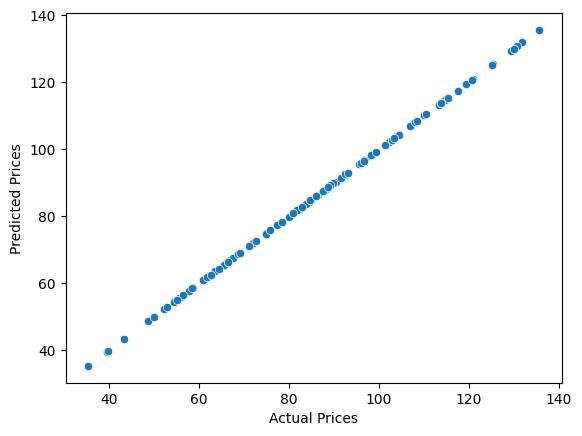

In [ ]:
plot = sns.scatterplot(x=df.Price, y=y_pred)
plot.set_xlabel('Actual Prices')
plot.set_ylabel('Predicted Prices')
